<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Linear Least Squares</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# LU Factorization
- The basic technique of solving $\mathbf{A}\mathbf{x}=\mathbf{y}$ is _Gaussian elimination_.

- Pivoting is usually employed to achieve better stability.

- Gaussian elimination is mathematically equivalent to the _LU factorization_:
$$\mathbf{A}
=\mathbf{L}\mathbf{U}
=\begin{bmatrix}
1 & 0 & \cdots & 0 \\
l_{10} & 1 & \cdots &0 \\
\vdots & \vdots & \ddots & \vdots \\
l_{n-1,0} & l_{n-1,1} & \cdots & 1
\end{bmatrix}
\begin{bmatrix} u_{00} & u_{01} & \cdots & u_{0,n-1} \\
0 & u_{11} & \cdots & u_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & u_{n-1,n-1}\end{bmatrix}.$$
The linear systems with the same $\mathbf{A}$ but different $\mathbf{y}$'s can be solved efficiently with explicit LU factorization.

- More efficient algorithms may be implemented if $\mathbf{A}$ has some special properties. (Check the documentation of [`scipy.linalg`](https://docs.scipy.org/doc/scipy/reference/linalg.html).)
    - Symmetric: $\mathbf{A}=\mathbf{A}^T$
    - Positive definite: $\mathbf{x}^T\mathbf{A}\mathbf{x}>0$ for all $\mathbf{x}\neq\mathbf{0}$
    - Banded: $a_{ij}=0$ if $|i-j|>\beta$, where $\beta$ is the bandwidth
    - Sparse: most $a_{ij}$ are 0.

- For example, _Cholesky factorization_ can be performed if $\mathbf{A}$ is symmetric and positive definite: $\mathbf{A}=\mathbf{L}\mathbf{L}^T$, where $\mathbf{L}$ is a lower triagnular matrix with positive diagonal entries.

# Homework Problem
- Think how the LU factorization can be used to compute the determinent and inverse of a nonsingular matrix.
- Implement a simple function to compute the inverse of an arbitrary square matrix using  `lu_factor()` and `lu_solve()` in `scipy.linalg`. Document and validate the function.
- Hint: For $\mathbf{A}\mathbf{X}=\mathbf{1}$, you can treat $\mathbf{X}$ and $\mathbf{1}$ as collections of column vectors. `numpy.eye(n)` returns a $n\times n$ identity matrix.

In [1]:
import numpy as np
import scipy.linalg as la
from numpy.random import random

import homework.hw5 as hw5

n = 10 # problem size
a = random(n*n).reshape((n,n))
np.allclose(la.inv(a), hw5.matinv(a)) # check if the elements of two matrices are close

True

# Linear Least Squares
- The linear system $\mathbf{A}\mathbf{x}=\mathbf{y}$ is _overdetermined_ if the size of vector $\mathbf{y}$ is larger than the size of vector $\mathbf{x}$.

- The _least squares_ solution $\mathbf{x}$ to $\mathbf{A}\mathbf{x}\simeq\mathbf{y}$ minimizes the 2-norm of the residual vector $\mathbf{r}=\mathbf{y}-\mathbf{A}\mathbf{x}$.

- Least squares can be used to fit function $f(t, \mathbf{x}) = \sum_{i=0}^{n-1} x_i \phi_i(t)$ to data $(t_i, y_i)$ ($i=0,1,\ldots,m-1$) by minimizing the 2-norm of:
$$\mathbf{r}
=\begin{bmatrix}y_0 \\ y_1 \\ \vdots \end{bmatrix}
-\begin{bmatrix}
\phi_0(t_0) & \phi_1(t_0) & \cdots \\
\phi_0(t_1) & \phi_1(t_1) & \cdots \\
\vdots & \vdots & \ddots\end{bmatrix}
\begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
.$$

- SciPy provides `linalg.lstsq()` to find the least squares solution.

In [2]:
m = 20 # number of points
n = 3 # number of fitting parameters
t = np.linspace(0, 10, m) # m points in [0, 10]
y = 1 + 2*t + t**2 + (random(m)-0.5) # noisy data points
A = np.empty((m, n)) # construct the matrix for a polynomial fit
A[:,0] = 1.; A[:,1] = t; A[:,2] = t**2
x, *_ = la.lstsq(A, y) # *_ catches the rest of the tuple

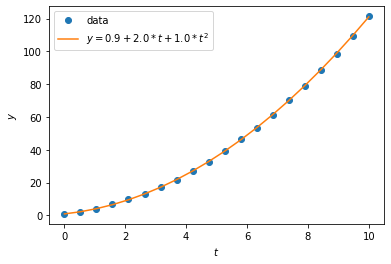

In [3]:
import matplotlib.pyplot as plt

plt.plot(t, y, 'o', label='data')
f = lambda z: x[0] + x[1]*z + x[2]*z**2 # fitting function
plt.plot(t, f(t), label=f'$y={x[0]:.1f}+{x[1]:.1f}* t+{x[2]:.1f}* t^2$')
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()

# Normal Equation
- Usually a $m$-vector $\mathbf{y}\notin\mathrm{span}(\mathbf{A})=\{\mathbf{A}\mathbf{x}:\mathbf{x}\in\mathbb{R}^n\}$ when $m>n$.

- $\Vert\mathbf{r}\Vert_2^2
=\mathbf{y}^T\mathbf{y}-2\mathbf{x}^T\mathbf{A}^T\mathbf{y}
+\mathbf{x}^T\mathbf{A}^T\mathbf{A}\mathbf{x}$ is the smallest when its derivative with repsect to $\mathbf{x}$ is 0, which gives the _normal equation_:
$$\mathbf{A}^T\mathbf{A}\mathbf{x}
=\mathbf{A}^T\mathbf{y}.$$

- Linear least squares problem always has solution.

- The solution is unique if the $m\times n$ matrix $\mathbf{A}$ has rank $n$, i.e. its column vectors are linearly independent.

- Because $\mathbf{A}^T\mathbf{A}$ is symmetric and positive definite, the normal equation can be solved by the Cholesky factorization: $\mathbf{A}^T\mathbf{A}=\mathbf{L}\mathbf{L}^T$.

In [4]:
x1 = la.cho_solve(la.cho_factor(A.T @ A), A.T @ y) # A.T is np.transpose(A)
print("least squares: x = ", x)
print("normal equation: x = ", x1)

least squares: x =  [0.93243874 1.98606727 1.0023226 ]
normal equation: x =  [0.93243874 1.98606727 1.0023226 ]


- The normal equation method can be unstable because $\mathbf{A}^T\mathbf{A}$ may have large condition number and rounding error.

# QR Factorization

- In QR factorization, 
$$\mathbf{A}= \mathbf{Q}\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}
=\begin{bmatrix}\mathbf{Q}_1\ \mathbf{Q_2}\end{bmatrix}
\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix} = \mathbf{Q}_1\mathbf{R},$$
where $\mathbf{Q}$ is a $m\times m$ orthogonal matrix ($\mathbf{Q}^T\mathbf{Q}=\mathbf{1}$), and $\mathbf{R}$ is a $n\times n$ upper triangular matrix.
The column vectors of $\mathbf{Q}_1$ form the orthonormal basis of $\mathrm{span}(\mathbf{A})$, and those of $\mathbf{Q}_2$ are the rest of the orthonormal basis vectors of $\mathbb{R}^m$ that are orthogonal to $\mathrm{span}(\mathbf{A})$.

- With the QR factorization, the linear least squares problem becomes
$$\mathbf{Q}^T\mathbf{A}\mathbf{x} 
= \begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}\mathbf{x}
\simeq \begin{bmatrix}\mathbf{z}_1\\ \mathbf{z}_2\end{bmatrix}
= \mathbf{Q}^T \mathbf{y}.$$
The least squares solution $\mathbf{x}$ can be solved from $\mathbf{R}\mathbf{x}=\mathbf{z}_1 = \mathbf{Q}_1^T y$ by backward substitution.

- A Givens rotation can annhilate one component in a column vector. For example,
$$\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & c & s & 0 \\
0 & -s & c & 0 \\
0 & 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ 0 \end{bmatrix}
= \begin{bmatrix} a_1 \\ a'_2 \\ 0 \\ 0 \end{bmatrix},$$
where 
$$c = \frac{a_2}{\sqrt{a_2^2+a_3^2}}
\qquad\mathrm{and}\qquad
s = \frac{a_3}{\sqrt{a_2^2+a_3^2}}.$$

- One can write the orthogonal matrix $\mathbf{Q}^T$ as the product of a series of Givens rotations so that $\mathbf{Q}^T\mathbf{A} = \begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}$.

- Most numerical routines use the _Householder transformation_ which is more efficient than Givens rotations.

- Explicity QR factorization can be formed using [`scipy.linalg.qr()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html#scipy.linalg.qr) if several least squares problems with the same matrix $\mathbf{A}$ need to be solved.

In [5]:
Q1, R = la.qr(A, mode='economic') # Q1(m,n) and R(n,n)
x2 = la.solve_triangular(R, Q1.T @ y) # R is upper triangular
print("least squares: x = ", x)
print("explicity QR: x = ", x2)

least squares: x =  [0.93243874 1.98606727 1.0023226 ]
explicity QR: x =  [0.93243874 1.98606727 1.0023226 ]


# Singular Value Decomposition (SVD)
- Because a real $m\times n$ matrix $\mathbf{A}$ maps an arbitrary vector $\mathbb{R}^n$ to a vector in $\mathbb{R}^m$, it can be decomposed as
$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma}\mathbf{V}^T
= \sum_{i=0}^{n-1}\sigma_i \mathbf{u}_i\mathbf{v}_i^T,$$
where $\mathbf{u}_i$ and $\mathbf{v}_i$ are the column vectors of the $m\times m$ orthogonal matrix $\mathbf{U}$ and the $n\times n$ orthogonal matrix $\mathbf{V}$, respectively, and $\mathbf{\Sigma}$ is a $m\times n$ diagonal matrix, and its diagonal entries
$$\sigma_0\geq \sigma_1 \geq \cdots \geq \sigma_{n-1}\geq 0$$
are called the _singular values_ of $\mathbf{A}$.

- SVD has many applications:
    - $\mathrm{rank}(\mathbf{A}) = $ number of nonzero singular values.
    
    - $\Vert\mathbf{A}\Vert_2 = \sigma_\max$ (Euclidean matrix norm).
    
    - $\mathrm{cond}_2(\mathbf{A})=\sigma_\max / \sigma_\min$ (Euclidean condition number).
    
- The _minimum norm solution_ to $\mathbf{A}\mathbf{x}\simeq \mathbf{y}$ is given by
$$\mathbf{x}=\sum_{i=0}^{k-1} \sigma_i^{-1}\, (\mathbf{u}_i^T\cdot\mathbf{y})\,\mathbf{v}_i,$$
where $k$ is the number of nonzero singular values of $\mathbf{A}$. In practice, small signular values can be dropped from the summation for more stability.

- SVD is more robust than the QR factorization (with the Householder transformation), but is much more expensive.

- [`scipy.linalg.svd()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd) performs the SVD decomposition.

In [6]:
U, s, Vt = la.svd(A)
print(U.shape, s.shape, Vt.shape)
# compute the least squares solution using SVD
x3 = np.zeros(n) 
smin = 1e-5*s[0] # minimum signular value to include
for i in range(n):
    if s[i] < smin: break
    x3 += ((U[:,i] @ y) / s[i]) * Vt[i,:]

print("least squares: x = ", x)
print("SVD: x = ", x3)

(20, 20) (3,) (3, 3)
least squares: x =  [0.93243874 1.98606727 1.0023226 ]
SVD: x =  [0.93243874 1.98606727 1.0023226 ]


# Homework
- The _pseudoinverse_ of a $m\times n$ real matrix $\mathbf{A}$ can be written as
$$\mathbf{A}^+ = \mathbf{V}\mathbf{\Sigma}^+\mathbf{U}^T,$$
where $\mathbf{\Sigma}^+$ is a $n\times m$ diagonal matrix with the first $k$ diagonal values being $1/\sigma_i$ ($\sigma_i\neq0)$ and the rest being 0. 

- Write a simple function to compute the pseudoinverse of an arbitrary real matrix. Validate that it produces the inverse of a nonsingular square matrix. Show how it may be used to solve the least squares problem. You may find `numpy.outer()` useful.